# Logistic Regression Classifier to recognize cats

Using logistic regression implemented with neural networks architecture to recognize cats

##### Note that:
Logistic Regression classifier class is implemented manually (you can find another version of it with the sklearn lib attached to the repo)

### 1 - Loading asset files and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from img_utils import *
from models import lr_model

### 2 - Loading dataset

In [2]:
X_train_org,y_train,X_test_org,y_test = load_dataset('datasets/train_catvnoncat.h5','datasets/test_catvnoncat.h5')

#### Visualizing images

label 1 is a cat


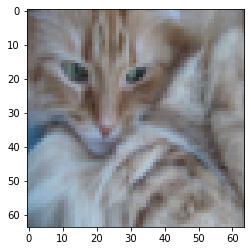

In [3]:
# health check(cat)
label_map = {
    1: 'is a cat',
    0: 'not a cat'
}
index = 2
visualize_image(index,X_train_org)
label = y_train[index]
print(f"label {label} {label_map[label]}")

#### Exploring data

In [4]:
m_train = len(y_train)
m_test = len(y_test)
num_px =X_train_org[0].shape[0]
y_train = y_train.reshape(1,m_train)
y_test = y_test.reshape(1,m_test)
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### 2 - Preparing data for training

In [5]:
X_train = flatten_image_tensor(X_train_org)
X_test = flatten_image_tensor(X_test_org)
# Standerdizing image
X_train = standardize(X_train)
X_test = standardize(X_test)

### 3- Training the model

In [6]:
results = lr_model(X_train,y_train,X_test,y_test,learning_rate = 0.005,num_iters=2000,print_cost=True)

Cost after iteration0: [[32.95268127]]
Cost after iteration100: [[32.96314522]]
Cost after iteration200: [[24.52967663]]
Cost after iteration300: [[16.21494566]]
Cost after iteration400: [[11.51197662]]
Cost after iteration500: [[10.55028471]]
Cost after iteration600: [[9.76808912]]
Cost after iteration700: [[9.10325857]]
Cost after iteration800: [[8.5289671]]
Cost after iteration900: [[8.02639532]]
Cost after iteration1000: [[7.58185375]]
Cost after iteration1100: [[7.18509892]]
Cost after iteration1200: [[6.82828665]]
Cost after iteration1300: [[6.50529162]]
Cost after iteration1400: [[6.2112493]]
Cost after iteration1500: [[5.94223853]]
Cost after iteration1600: [[5.69505633]]
Cost after iteration1700: [[5.46705496]]
Cost after iteration1800: [[5.25602183]]
Cost after iteration1900: [[5.06008984]]
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


### 4-Experimenting accuracy of the model

index 9 predicts label 1.0 (is a cat)


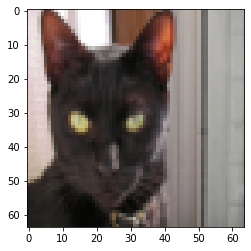

In [7]:
y_preds = results['y_test_preds']
index = 9
label = y_preds[0][index]
visualize_image(index,X_test_org)
print(f"index {index} predicts label {label} ({label_map[label]})")

### 5-Analysis of the learning rates

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 97.60765550239235 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0005
train accuracy: 82.77511961722487 %
test accuracy: 56.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



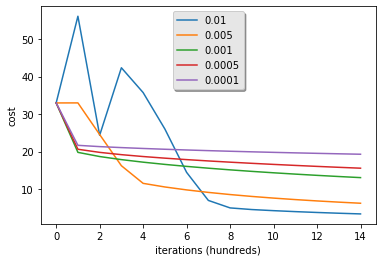

In [8]:
learning_rates = [0.01, 0.005,0.001,0.0005, 0.0001]
models = {}
for alpha in learning_rates:
    print ("learning rate is: " + str(alpha))
    models[str(alpha)] = lr_model(X_train ,y_train, X_test, y_test, num_iters = 1500, learning_rate = alpha, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for alpha in learning_rates:
    plt.plot(np.squeeze(models[str(alpha)]["costs"]), label= str(models[str(alpha)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

We conclude that the best learning rate to work with this model is when alpha is set to the value 0.005

### 6- Classify custom image
To add your cutom image, upload the image to the images directory (not mandatory) and specify the path of the image in the function parameters

Classifier predicts label 1.0 (is a cat)


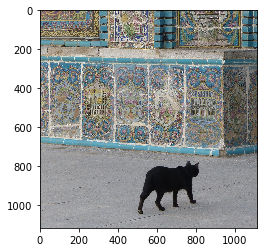

In [9]:
image_path = 'images/cat_in_street.jpg'
predict_custom_img(image_path,X_train,y_train,num_px,label_map)